In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_csv('train.csv')

In [ ]:
df.head()

,Number of Subcarrier,Signal Constellation,Eb/No,ofdm_std,ofdm_max,BER,Unnamed: 6
0,1024,4,8.0,0.020590,0.119134,0.000120,NaN
1,512,4,8.0,0.029397,0.190842,0.000179,NaN
2,256,4,8.0,0.044601,0.197412,0.000160,NaN
3,128,4,8.0,0.059644,0.267715,0.000220,NaN
4,64,4,8.0,0.079258,0.351700,0.000140,NaN


In [ ]:
df.shape

(35, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Number of Subcarrier  35 non-null     int64  
 1   Signal Constellation  35 non-null     int64  
 2   Eb/No                 35 non-null     float64
 3   ofdm_std              35 non-null     float64
 4   ofdm_max              35 non-null     float64
 5   BER                   35 non-null     float64
 6   Unnamed: 6            0 non-null      float64
dtypes: float64(5), int64(2)
memory usage: 2.0 KB


In [ ]:
df.drop('Unnamed: 6', axis = 1).head(5)

,Number of Subcarrier,Signal Constellation,Eb/No,ofdm_std,ofdm_max,BER
0,1024,4,8.0,0.020590,0.119134,0.000120
1,512,4,8.0,0.029397,0.190842,0.000179
2,256,4,8.0,0.044601,0.197412,0.000160
3,128,4,8.0,0.059644,0.267715,0.000220
4,64,4,8.0,0.079258,0.351700,0.000140


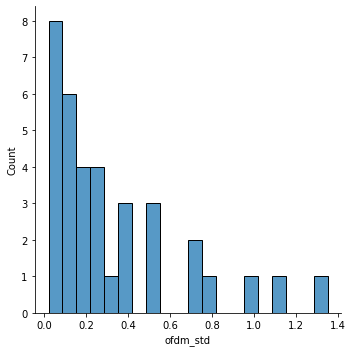

In [ ]:
sns.displot(df['ofdm_std'], bins = 20)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


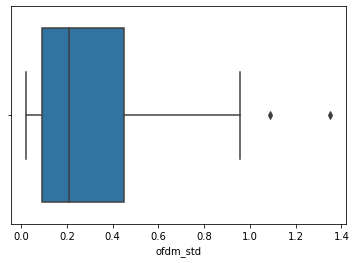

In [ ]:
sns.boxplot(df['ofdm_std'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


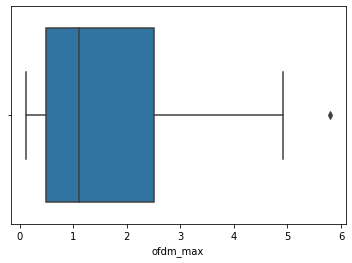

In [ ]:
sns.boxplot(df['ofdm_max'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


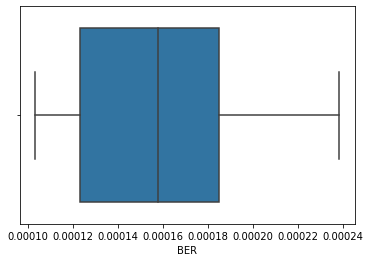

In [ ]:
sns.boxplot(df['BER'])

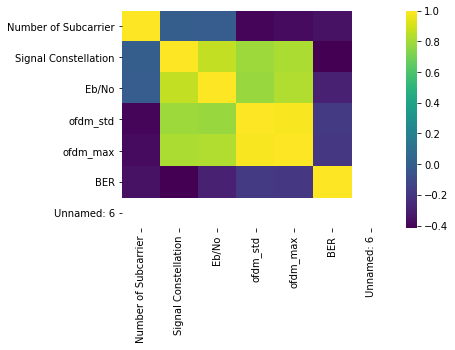

In [ ]:
sns.heatmap(df.corr(),cmap='viridis')

In [ ]:
x = df.drop(['Eb/No','Unnamed: 6'], axis = 1)
y = df['Eb/No']

In [ ]:
x.head()

,Number of Subcarrier,Signal Constellation,ofdm_std,ofdm_max,BER
0,1024,4,0.020590,0.119134,0.000120
1,512,4,0.029397,0.190842,0.000179
2,256,4,0.044601,0.197412,0.000160
3,128,4,0.059644,0.267715,0.000220
4,64,4,0.079258,0.351700,0.000140


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 5)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linear_model=  LinearRegression()
linear_model.fit(x_train,y_train)    #training the model

rs_sq = linear_model.score(x_train, y_train);
print('coefficient of determination:', rs_sq)
print('intercept:', linear_model.intercept_)
print('slope:', linear_model.coef_)                 #Printing co-efficients for Table 4

predictions = linear_model.predict(x_test)
training_acc = linear_model.score(x_train,y_train)
validation_acc= linear_model.score(x_test,y_test)

print("training accuracy: %2f"%training_acc)        #Printing training and test accuracy
print("test accuracy: %2f"%validation_acc)

y_pred= linear_model.predict(x_test)    #predicting the bias value

print(y_test)
print(y_pred)

#******Calculating RMSE and R2-square*****
mse = np.sum((y_pred - y_test)**2);
rmse = np.sqrt(mse/7);
sst = np.sum((y_test - np.mean(y_test))**2);
r2_score = 1 - (mse/sst);

print("RMSE Value: %2f"%rmse)                     #Printing RMSE and R2-square value
print("R2-square Value: %2f"%r2_score)

coefficient of determination: 0.8762932389960333
intercept: 7.565727304929119
slope: [ 6.40136632e-03  4.36914373e-03 -1.34641787e+01  5.51577901e+00
  8.03829078e+03]
training accuracy: 0.876293
test accuracy: 0.741395
31    14.0
22    23.5
3      8.0
18    21.0
20    23.0
5     12.0
0      8.0
19    21.0
23    23.0
10    16.0
32    14.0
Name: Eb/No, dtype: float64
[13.63643874 22.53220694 10.84291153 19.36527612 23.50339756 16.07514422
 15.47930851 21.9509388  22.09500249 17.70671621 12.75670231]
RMSE Value: 3.601696
R2-square Value: 0.741395
